### Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


In [1]:
#IMPORT LIBRARIES 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#IMPORT DATASET
data=pd.read_csv('datasets_11167_15520_train.csv')

In [3]:
#BASIC CHECKS
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.shape

(2000, 21)

In [6]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [9]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### INSIGHTS

*There are no missing values found in this dataset

# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

<Axes: xlabel='price_range', ylabel='count'>

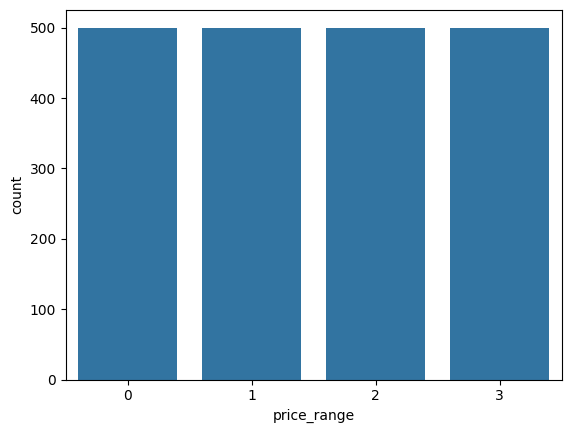

In [10]:
sns.countplot(x=data.price_range)

In [11]:
data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

### INSIGHTS
*All the four results have been equally distributed

## BIVARIATE ANALYSIS

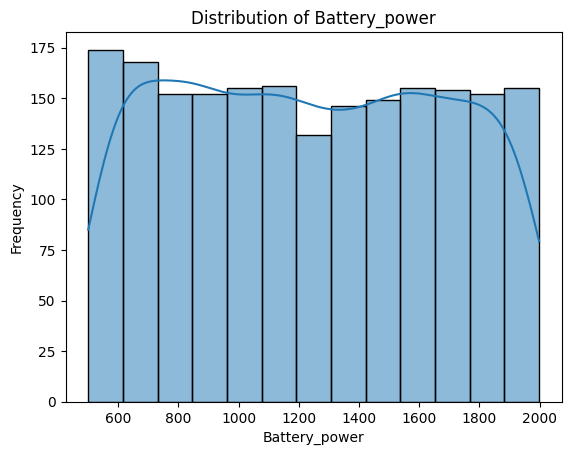

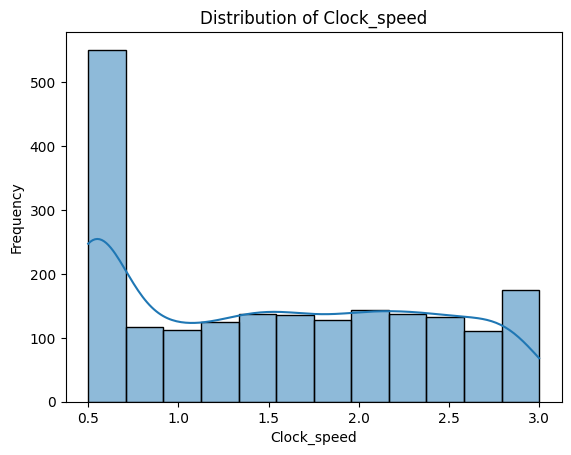

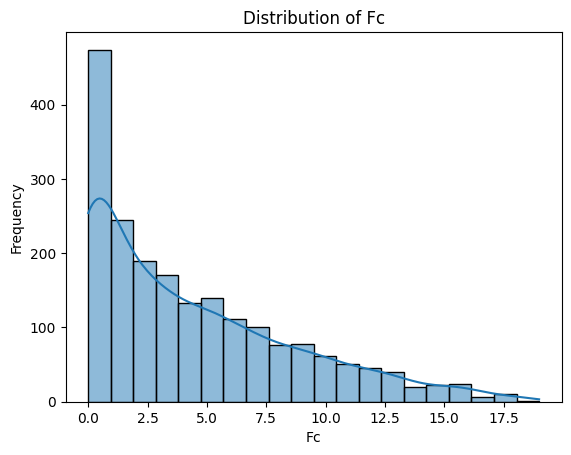

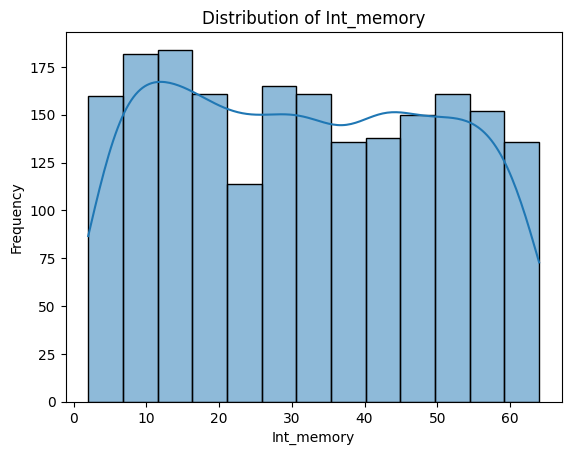

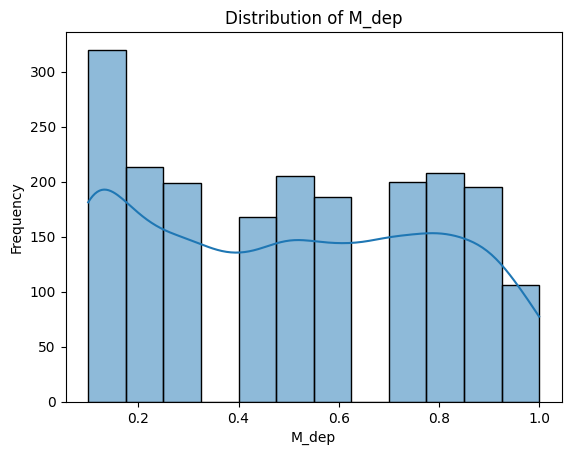

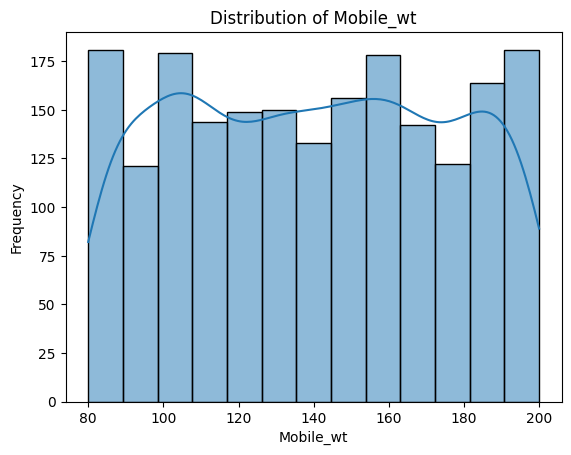

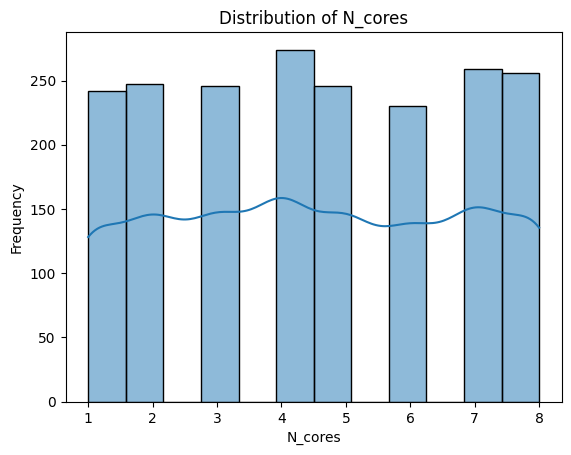

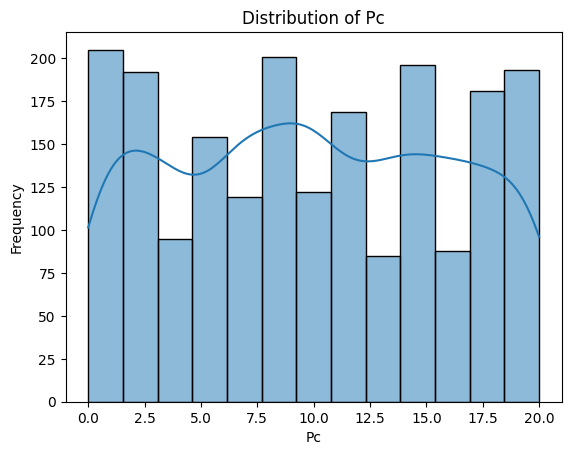

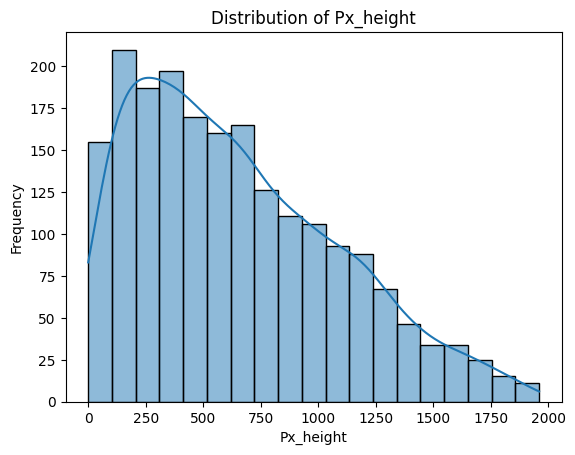

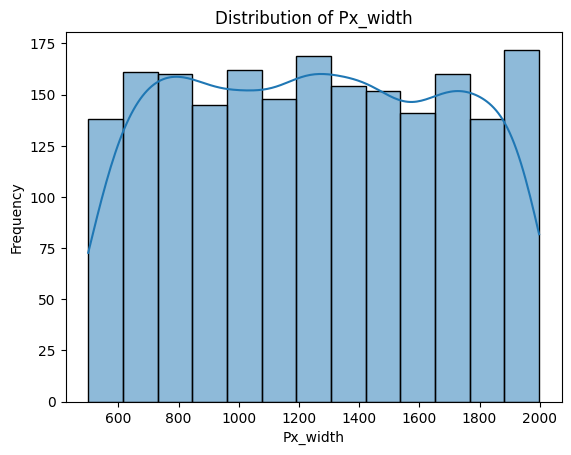

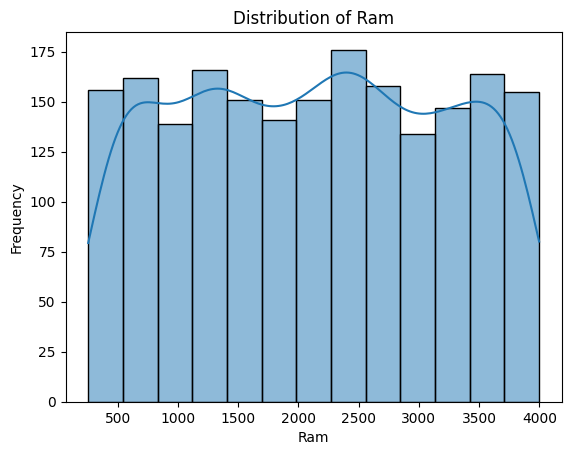

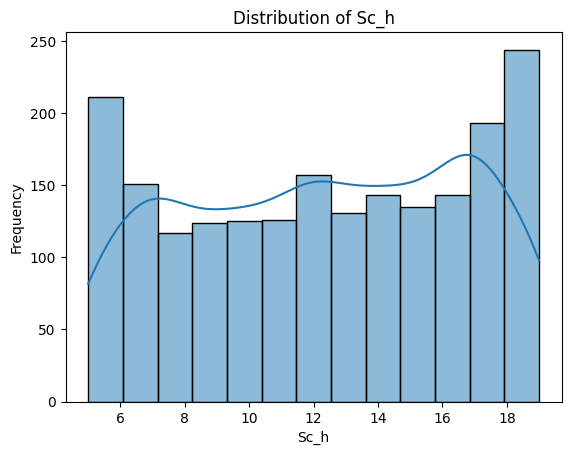

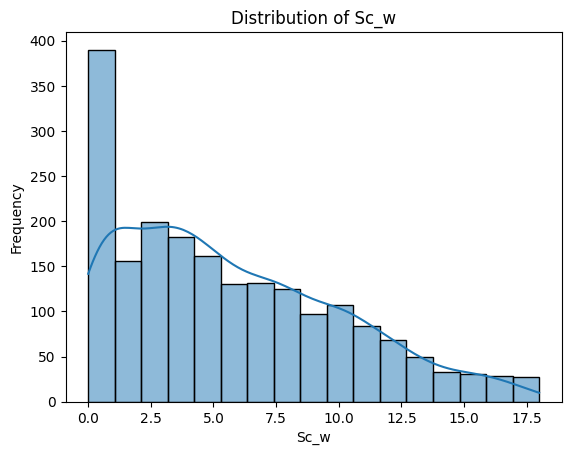

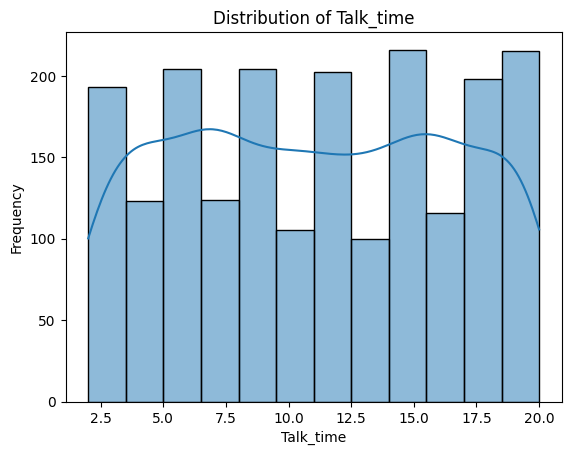

In [12]:
# List of numerical columns
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
                  'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create histogram plots for numerical variables
for col in numerical_cols:
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f"Distribution of {col.capitalize()}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Frequency")
    plt.show()

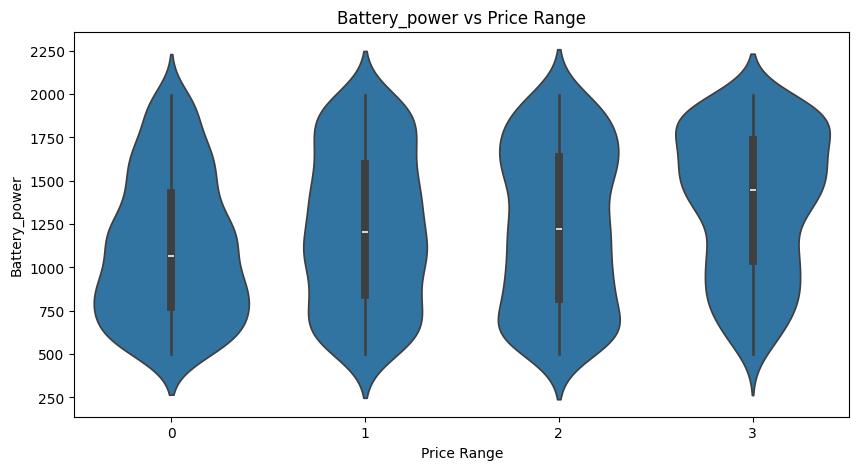

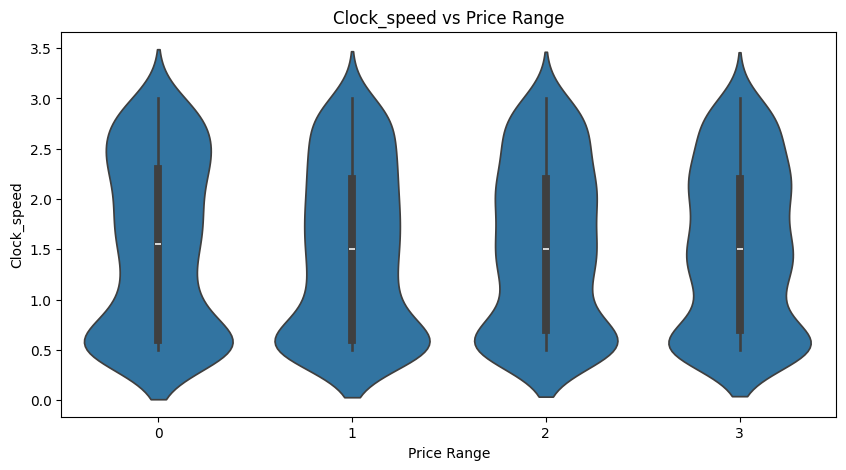

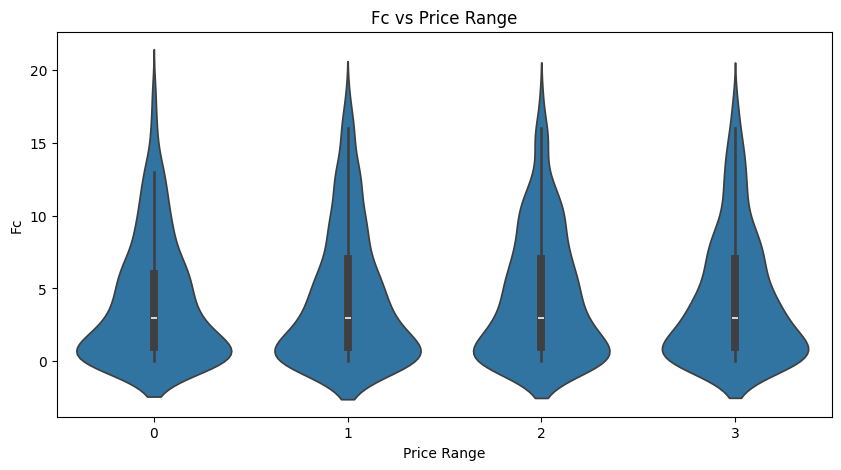

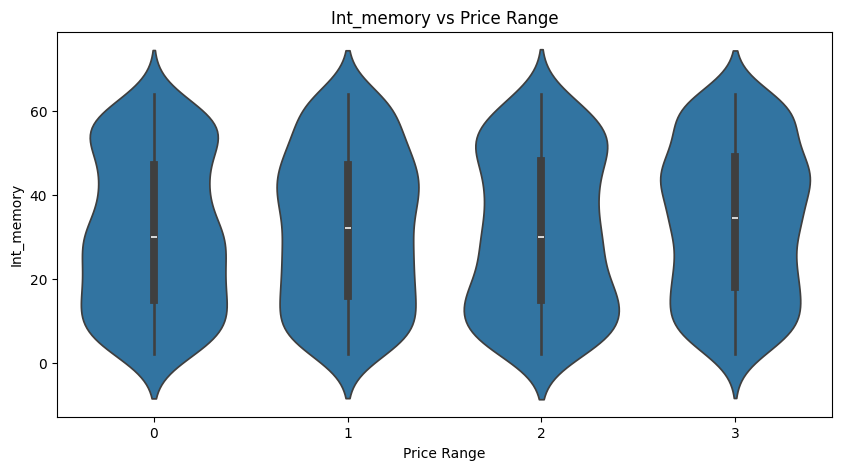

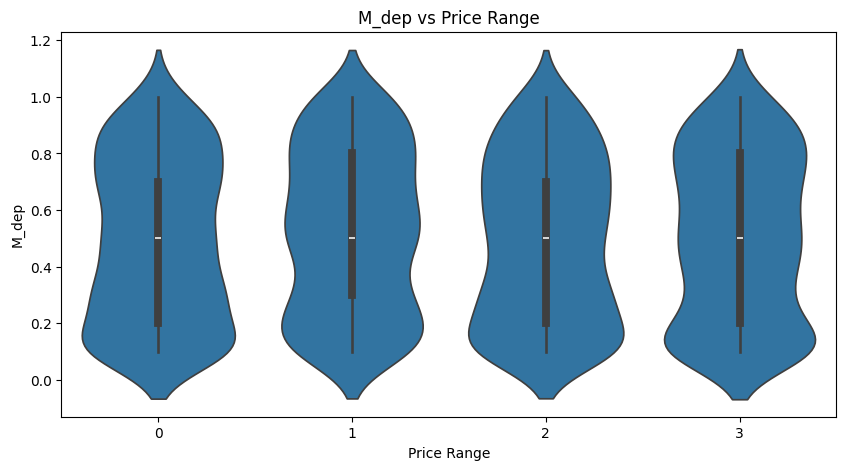

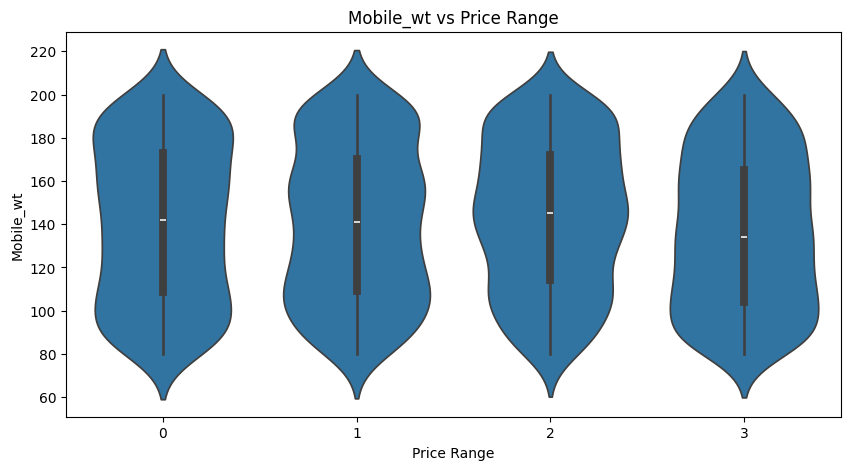

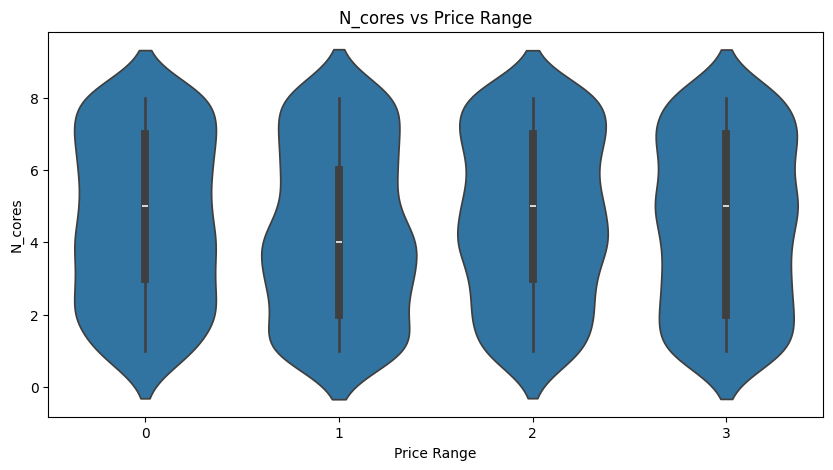

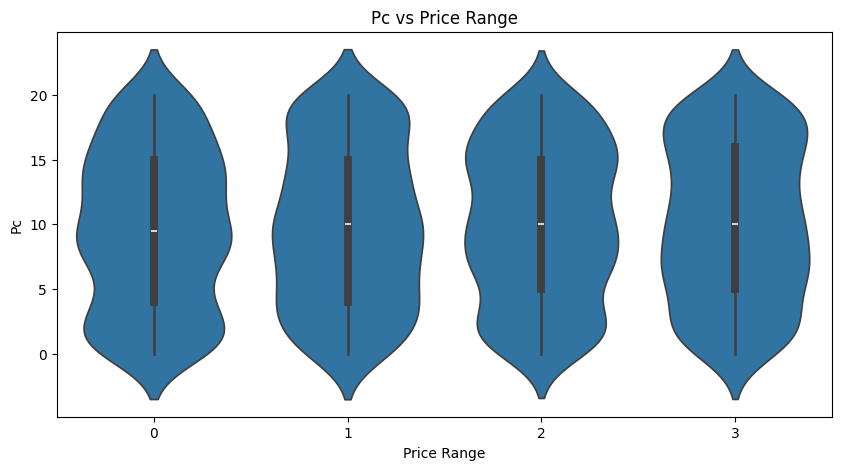

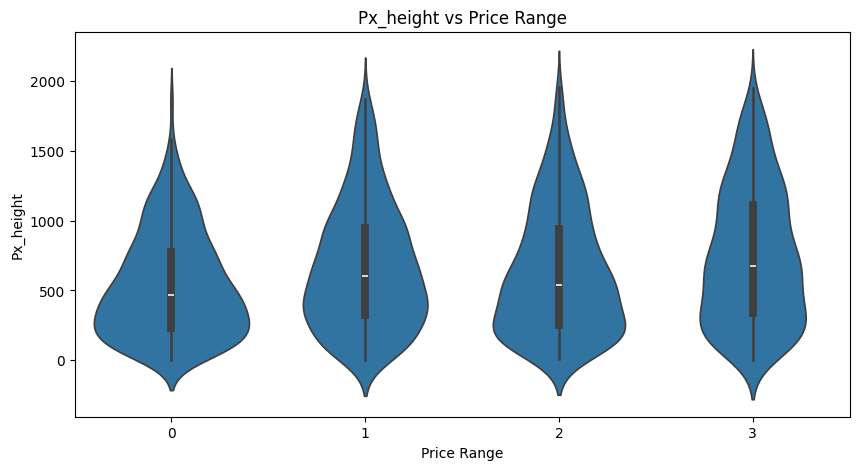

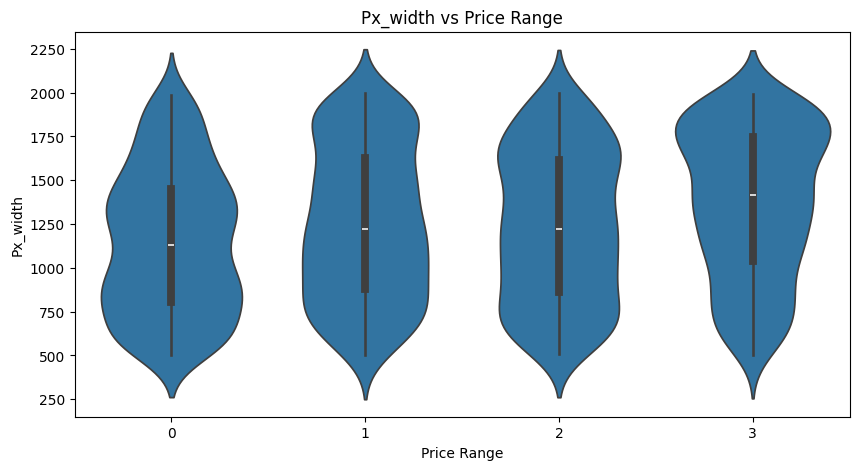

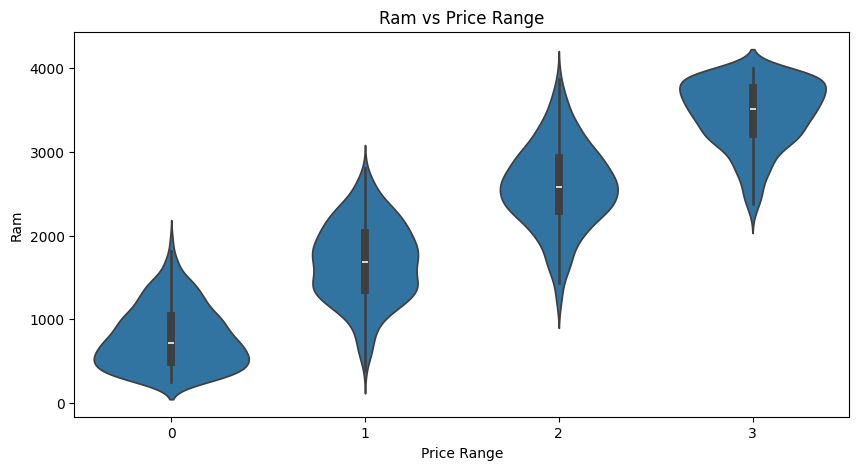

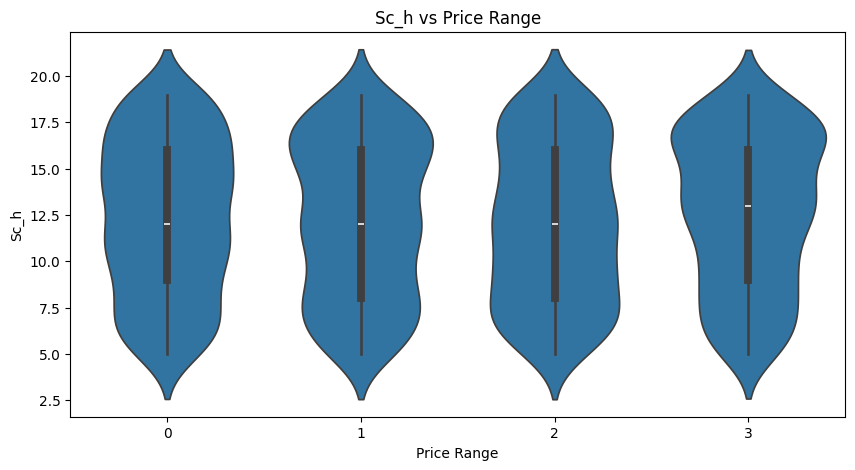

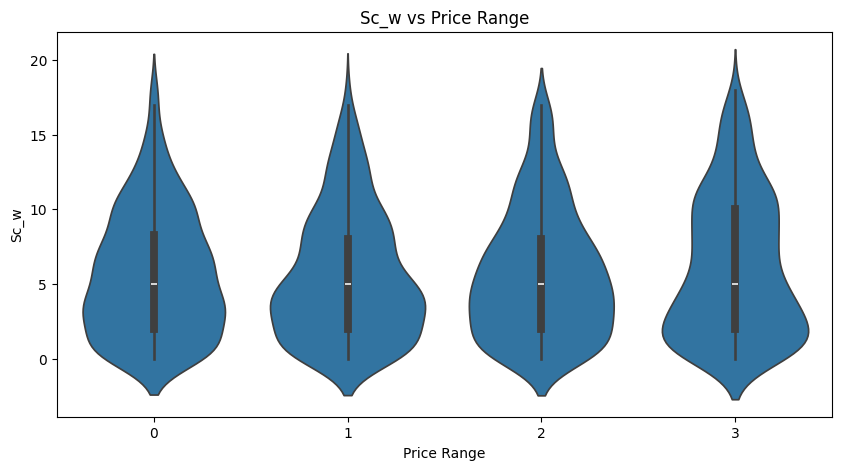

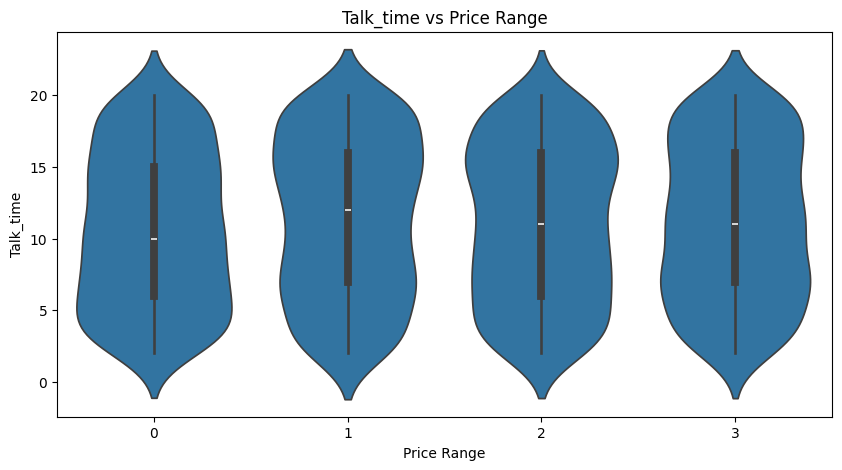

In [15]:
# List of numerical columns
numerical_cols = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 
                  'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

# Create violin plots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.violinplot(x='price_range', y=col, data=data)
    plt.title(f"{col.capitalize()} vs Price Range")
    plt.xlabel("Price Range")
    plt.ylabel(col.capitalize())
    plt.show()


## INSIGHTS FOR BIVARIATE ANALYSIS

*In the case of battery power, phones with lower prices tend to have lower battery power.
 Mid-range phones typically have moderate to good battery power, while high-range phones often have very high battery power.

*In this case, most phones across all price ranges tend to have lower clock speeds

*Most phones have front camera pixels between 0-5 megapixels

*In this case of int_memory that low-range phones have lower internal storage, 
 while only mid to high-range phones (price ranges 2 and 3) have higher internal storage

*When the phone is thicker, the price of the phone tends to be lower. High-end model phones are generally slimmer 

*In the case of mobile weight, lower and mid-range phones have a mix of both heavier and lighter phones, while higher-end mobiles 
 tend to have more lightweight phones

*Lower range phones have 2 to 6 N_cores ,meanwhile mid-range and high-end phones have more than 6 N_cores

*In the case of primary cameras, lower-level phones typically have 4 to 15 megapixels, while higher-end phones often 
 have primary camera megapixels greater than 15

*Lower-end phones have RAM lower than 2000 MB (2 GB), while high-end phones typically have RAM greater than 2000 MB (2 GB) for better performance 

*In the case of screen height (sc_h), both lower and higher-end phones have most of their phones with a screen height greater than 15 cm

*In this case of screen width (sc_w),all the category phones have lower width 

*Only the lower end phones have less talktime and all the others have higher talktime






# DATA PRE-PROCESSING

In [16]:
#Check for missing values 
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


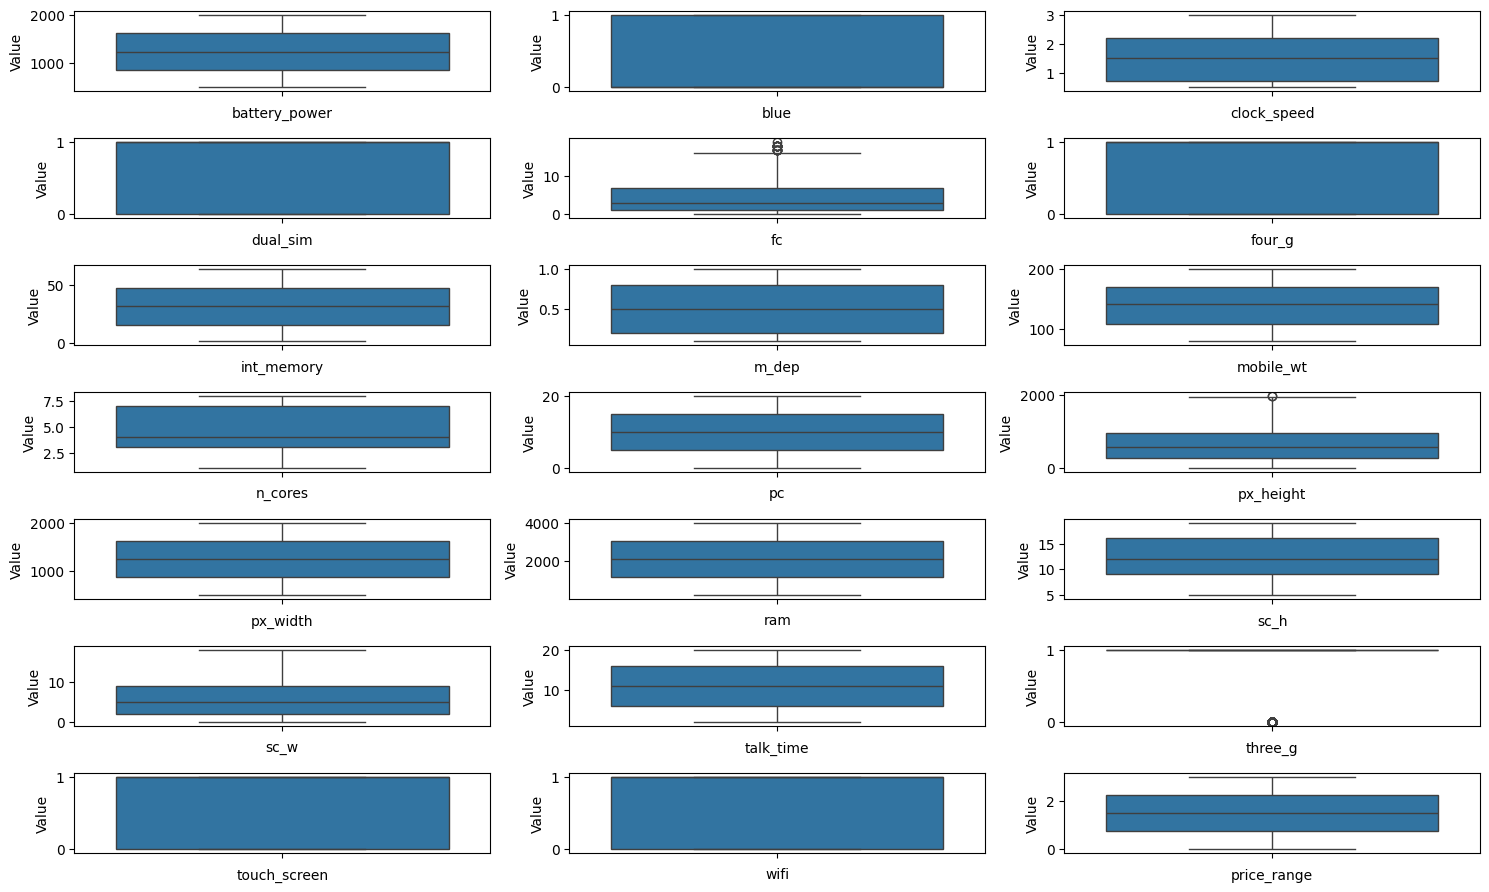

In [21]:
#CHECKING FOR OUTLIERS
# Select only numerical columns for the box plots
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10), facecolor='white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <= len(numerical_columns):
        ax = plt.subplot(len(numerical_columns) // 3 + 1, 3, plotnumber)
        sns.boxplot(y=data[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel("Value", fontsize=10)
    plotnumber += 1

plt.tight_layout()
plt.show()

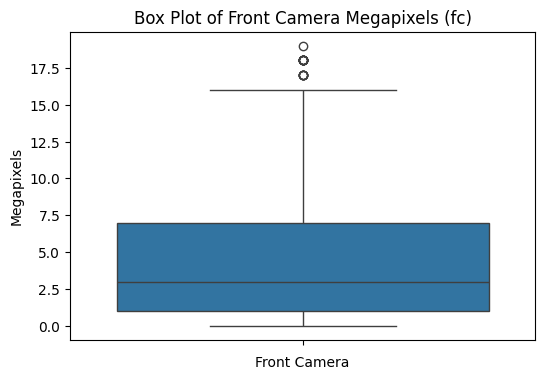

In [23]:
# Box plot for the 'fc' column
plt.figure(figsize=(6, 4), facecolor='white')
sns.boxplot(y=data['fc'])
plt.title("Box Plot of Front Camera Megapixels (fc)")
plt.xlabel("Front Camera")
plt.ylabel("Megapixels")
plt.show()

### INSIGHTS
*Only fc has some outliers

In [24]:
#Handling the outliers for fc by using IQR METHOD
Q1=data['fc'].quantile(0.25)
print("lower quantile",Q1)
Q3=data['fc'].quantile(0.75)
print("upper quantile",Q3)

lower quantile 1.0
upper quantile 7.0


In [25]:
IQR=Q3-Q1
IQR

6.0

In [26]:
#Find upperlimit and lowerlimit
lower_limit=Q1-1.5*IQR
print('lower limit is',lower_limit)
upper_limit=Q3+1.5*IQR
print('upper limit is',upper_limit)

lower limit is -8.0
upper limit is 16.0


In [27]:
#Find values above upperlimit
data.loc[data['fc']>upper_limit]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,...,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,...,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,...,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,...,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,...,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,...,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,...,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,...,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,...,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,...,142,1039,1220,9,3,20,0,1,0,1


In [28]:
#find the percentage of outliers
len(data.loc[data['fc']>upper_limit])/len(data)

0.009

In [29]:
#Handle the outliers 
data.loc[data['fc']>upper_limit,'fc']=data['fc'].median()

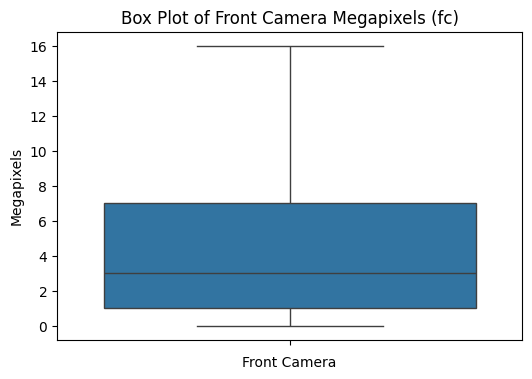

In [30]:
# Box plot for the 'fc' column
plt.figure(figsize=(6, 4), facecolor='white')
sns.boxplot(y=data['fc'])
plt.title("Box Plot of Front Camera Megapixels (fc)")
plt.xlabel("Front Camera")
plt.ylabel("Megapixels")
plt.show()

# SCALING

In [36]:
from sklearn.preprocessing import StandardScaler


# Separate features and target
target = data['price_range']
features = data.drop('price_range', axis=1)

# Ensure all feature columns are numeric
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns
features = features[numeric_features]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Add the target column back to the DataFrame
newdata = pd.concat([scaled_features_df, target.reset_index(drop=True)], axis=1)

# Display the first few rows of the scaled data
print(newdata.head())





   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.765716 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -1.006735  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.524698  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -1.006735 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.126507  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971  ...  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768  ...   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639  ...   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842  ...   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  ...   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  \
0  0.391703 -0.784983  0.283103   1.

In [37]:
newdata.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1


# FEATURE SELECTION

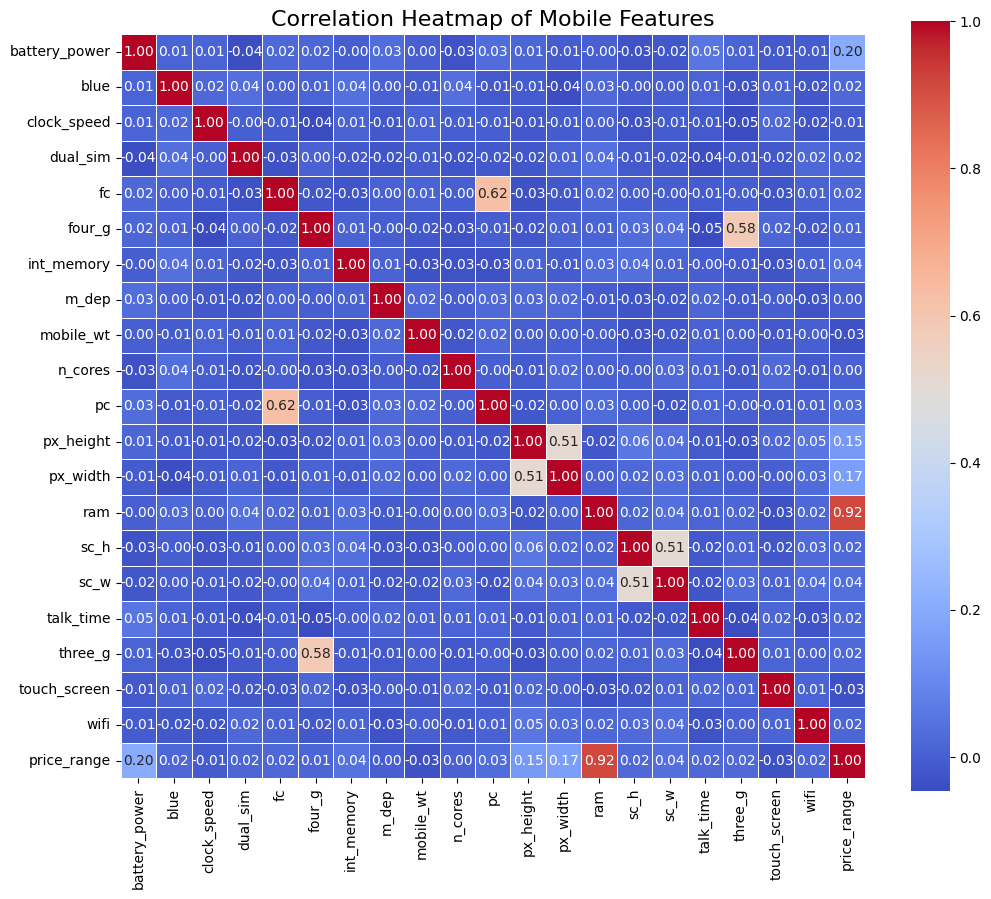

In [39]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Add title
plt.title("Correlation Heatmap of Mobile Features", fontsize=16)

# Display the heatmap
plt.show()

### INSIGHTS

*Only ram has 0.92 values which means its highly important feature to predict the prices


# MODEL BULIDING 

In [40]:
newdata

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.765716,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-1.006735,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.524698,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-1.006735,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.126507,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-1.006735,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-1.006735,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.765716,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.042660,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,0


In [41]:
from sklearn.model_selection import train_test_split

# Separate features and target
target = data['price_range']
features = data.drop('price_range', axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1600, 20)
X_test shape: (400, 20)
y_train shape: (1600,)
y_test shape: (400,)


In [44]:

from imblearn.over_sampling import SMOTE

# Separate features and target
target = data['price_range']
features = data.drop('price_range', axis=1)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(features, target)

# Display the shape of the resampled data
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)


X_resampled shape: (2000, 20)
y_resampled shape: (2000,)


# APPLYING ALL SUITABLE ALGORITHMS

In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report



# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42)
}

# Initialize lists to store results
results = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "0 Precision": report['0']['precision'],
        "1 Precision": report['1']['precision'],
        "2 Precision": report['2']['precision'],
        "3 Precision": report['3']['precision']
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)


                 Classifier  Accuracy  Precision  Recall  F1-score  \
0             Random Forest    0.8925   0.896138  0.8925  0.893340   
1       Logistic Regression    0.6325   0.636749  0.6325  0.633962   
2    Support Vector Machine    0.9650   0.965478  0.9650  0.965036   
3         Gradient Boosting    0.9050   0.906446  0.9050  0.905496   
4  Decision Tree Classifier    0.8325   0.833662  0.8325  0.831587   

   0 Precision  1 Precision  2 Precision  3 Precision  
0     0.952830     0.887640     0.784314     0.941748  
1     0.822917     0.516854     0.479167     0.689076  
2     0.990385     0.947368     0.935484     0.981481  
3     0.961538     0.890110     0.824742     0.935185  
4     0.901961     0.752475     0.800000     0.863248  


# CONCLUISON

### Introduction:

In this analysis, we explored the performance of several machine learning classifiers in predicting the 
price range of mobile phones based on their specifications. The objective was to assist people in 
understanding the relationship between various features of mobile phones and their selling prices, ultimately aiding in pricing strategy and market competitiveness.

### TECHNIQUE USED 

#### ADDRESSING IMBALANCED CLASSES:

*Techniques such as oversampling the minority class (using Synthetic Minority Over-sampling Technique - SMOTE) or undersampling the majority class were employed to address class imbalance. SMOTE was chosen due to its effectiveness in generating synthetic samples that closely resemble the minority class instances.

#### HANDLING THE OUTLIERS:

*The outliers are handled using IQR method for better results in the analysishe analysis

#### COMPARISION OF ALL ALOGORITHMS USED 

#### Accuracy Comparison:
Random Forest: 89.25%

Logistic Regression: 63.25%

Support Vector Machine: 96.50%

Gradient Boosting: 90.50%

Decision Tree Classifier: 83.25%

#### Precision Comparison:
Random Forest: Class 0: 95.28%, Class 1: 88.76%, Class 2: 78.43%, Class 3: 94.17%

Logistic Regression: Class 0: 82.29%, Class 1: 51.69%, Class 2: 47.92%, Class 3: 68.91%

Support Vector Machine: Class 0: 99.04%, Class 1: 94.74%, Class 2: 93.55%, Class 3: 98.15%

Gradient Boosting: Class 0: 96.15%, Class 1: 89.01%, Class 2: 82.47%, Class 3: 93.52%

Decision Tree Classifier: Class 0: 90.20%, Class 1: 75.25%, Class 2: 80.00%, Class 3: 86.32%

#### Recall Comparison:
Random Forest: 89.25%

Logistic Regression: 63.25%

Support Vector Machine: 96.50%

Gradient Boosting: 90.50%

Decision Tree Classifier: 83.25%

#### F1-score Comparison:
Random Forest: 89.33%

Logistic Regression: 63.40%

Support Vector Machine: 96.50%

Gradient Boosting: 90.55%

Decision Tree Classifier: 83.16%

From the above analysis, it can be observed that the Support Vector Machine classifier achieved the 
highest accuracy, precision, recall, and F1-score among all classifiers. 

From the results, it is evident that the Support Vector Machine classifier outperformed others in terms of accuracy, precision, recall, and 
F1-score, achieving an impressive accuracy of 96.50%. This suggests that SVM may be a suitable 
choice for predicting the price range of mobile phones based on their specifications